# Adajcency Graph 생성

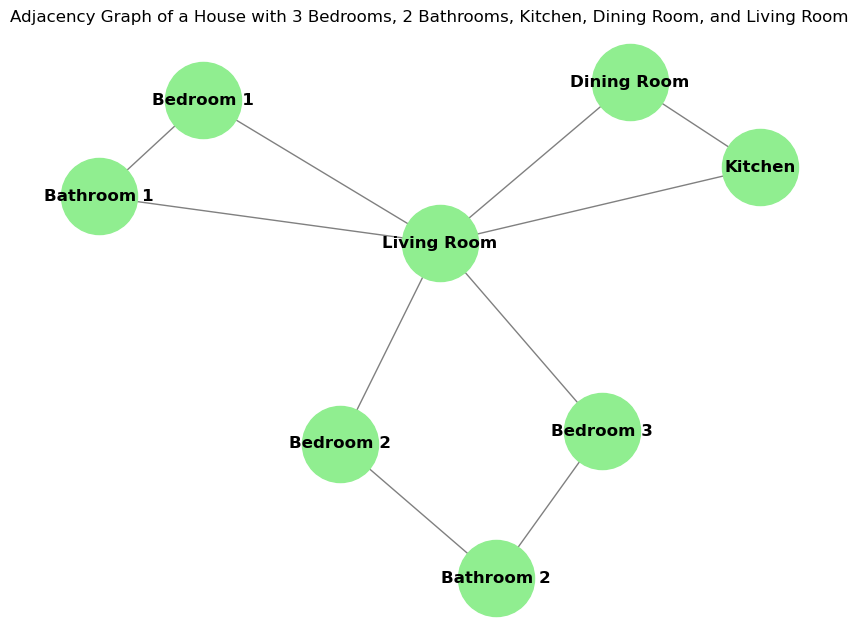

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# 인접 그래프를 나타내기 위한 그래프 객체 생성

G = nx.Graph()

# 방(노드) 추가 (거실, 부엌, 3개의 침실, 2개의 화장실, 다이닝룸)
rooms = ["Living Room", "Kitchen", "Dining Room", "Bedroom 1", "Bedroom 2", "Bedroom 3", "Bathroom 1", "Bathroom 2"]
G.add_nodes_from(rooms)

# 방들 사이의 연결(엣지) 추가
edges = [
    ("Living Room", "Kitchen"),
    ("Living Room", "Dining Room"),
    ("Living Room", "Bedroom 1"),
    ("Living Room", "Bedroom 2"),
    ("Living Room", "Bedroom 3"),
    ("Living Room", "Bathroom 1"),
    ("Bedroom 1", "Bathroom 1"),
    ("Bedroom 2", "Bathroom 2"),
    ("Bedroom 3", "Bathroom 2"),
    ("Kitchen", "Dining Room")
]

G.add_edges_from(edges)

# 그래프 그리기
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgreen", font_size=12, font_weight="bold", edge_color="gray")
plt.title("Adjacency Graph of a House with 3 Bedrooms, 2 Bathrooms, Kitchen, Dining Room, and Living Room")
plt.show()


In [1]:
def generate_floorplan(graph, room_sizes):
    positions = {}
    visited = set()
    
    # Step 1: Start with the central room (Living Room)
    positions["Living Room"] = (0, 0)
    visited.add("Living Room")
    
    # Step 2: Define initial offsets
    offsets = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # right, left, up, down
    
    def place_room(room, base_position):
        for offset in offsets:
            new_position = (base_position[0] + offset[0], base_position[1] + offset[1])
            if new_position not in positions.values():
                positions[room] = new_position
                return
    
    # Step 3: Traverse the graph and place the rooms
    for room in graph["Living Room"]:
        place_room(room, positions["Living Room"])
        visited.add(room)
        
        # Place connected rooms
        for connected_room in graph[room]:
            if connected_room not in visited:
                place_room(connected_room, positions[room])
                visited.add(connected_room)
    
    return positions

# Example usage
graph = {
    "Living Room": ["Kitchen", "Dining Room", "Bedroom 1", "Bedroom 2", "Bedroom 3", "Bathroom 1"],
    "Kitchen": ["Dining Room", "Bathroom 2"],
    "Dining Room": [],
    "Bedroom 1": ["Bathroom 1"],
    "Bedroom 2": ["Bathroom 2"],
    "Bedroom 3": ["Bathroom 2"],
    "Bathroom 1": [],
    "Bathroom 2": []
}

room_sizes = {
    "Living Room": (4, 4),
    "Kitchen": (3, 3),
    "Dining Room": (3, 3),
    "Bedroom 1": (3, 3),
    "Bedroom 2": (3, 3),
    "Bedroom 3": (3, 3),
    "Bathroom 1": (2, 2),
    "Bathroom 2": (2, 2)
}

positions = generate_floorplan(graph, room_sizes)
print(positions)


{'Living Room': (0, 0), 'Kitchen': (1, 0), 'Dining Room': (-1, 0), 'Bathroom 2': (1, 1), 'Bedroom 1': (0, 1), 'Bathroom 1': (-1, 1), 'Bedroom 2': (0, -1)}


KeyError: 'Bedroom 3'

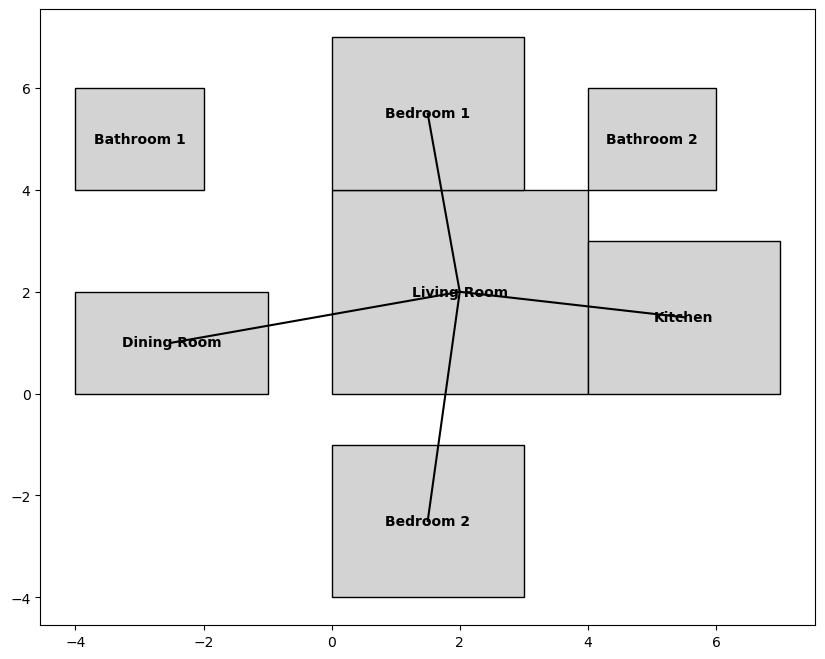

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 인접 그래프와 방 크기 정의
graph = {
    "Living Room": ["Kitchen", "Dining Room", "Bedroom 1", "Bedroom 2", "Bedroom 3", "Bathroom 1"],
    "Kitchen": ["Dining Room", "Bathroom 2"],
    "Dining Room": [],
    "Bedroom 1": ["Bathroom 1"],
    "Bedroom 2": ["Bathroom 2"],
    "Bedroom 3": ["Bathroom 2"],
    "Bathroom 1": [],
    "Bathroom 2": []
}

room_sizes = {
    "Living Room": (4, 4),
    "Kitchen": (3, 3),
    "Dining Room": (3, 2),
    "Bedroom 1": (3, 3),
    "Bedroom 2": (3, 3),
    "Bedroom 3": (3, 3),
    "Bathroom 1": (2, 2),
    "Bathroom 2": (2, 2)
}

# 위치 결정 함수
def generate_floorplan(graph, room_sizes):
    positions = {}
    visited = set()
    
    # Step 1: Start with the central room (Living Room)
    positions["Living Room"] = (0, 0)
    visited.add("Living Room")
    
    # Step 2: Define initial offsets
    offsets = [(4, 0), (-4, 0), (0, 4), (0, -4)]  # right, left, up, down
    
    def place_room(room, base_position):
        for offset in offsets:
            new_position = (base_position[0] + offset[0], base_position[1] + offset[1])
            if new_position not in positions.values():
                positions[room] = new_position
                return
    
    # Step 3: Traverse the graph and place the rooms
    for room in graph["Living Room"]:
        place_room(room, positions["Living Room"])
        visited.add(room)
        
        # Place connected rooms
        for connected_room in graph[room]:
            if connected_room not in visited:
                place_room(connected_room, positions[room])
                visited.add(connected_room)
    
    return positions

# 위치 계산
positions = generate_floorplan(graph, room_sizes)

# Floorplan 그리기 함수
def draw_floorplan(positions, room_sizes, connections):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    for room, (x, y) in positions.items():
        width, height = room_sizes[room]
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        plt.text(x + width/2, y + height/2, room, ha='center', va='center', fontsize=10, fontweight='bold')
    
    for room1, room2 in connections:
        x1, y1 = positions[room1]
        x2, y2 = positions[room2]
        plt.plot([x1 + room_sizes[room1][0]/2, x2 + room_sizes[room2][0]/2], 
                 [y1 + room_sizes[room1][1]/2, y2 + room_sizes[room2][1]/2], 'k-')
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.title("Auto-generated Floorplan based on Adjacency Graph")
    plt.show()

# 연결 설정
connections = []
for room in graph:
    for connected_room in graph[room]:
        connections.append((room, connected_room))

# Floorplan 그리기
draw_floorplan(positions, room_sizes, connections)


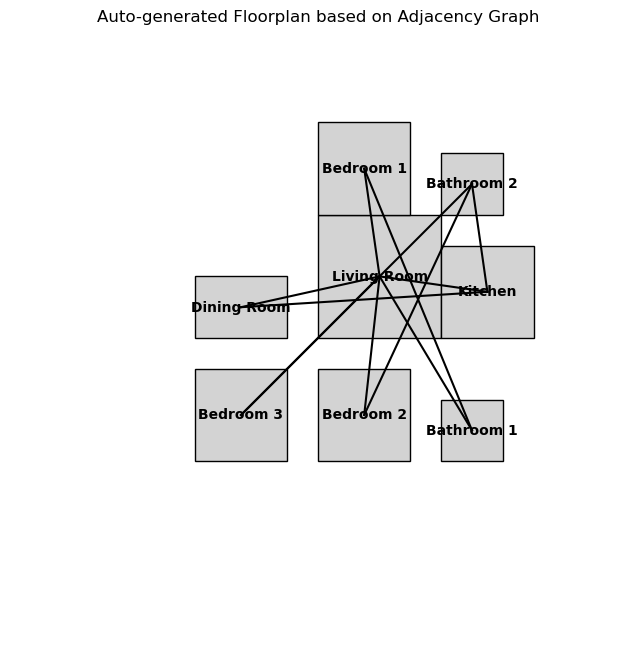

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# 인접 그래프와 방 크기 정의
graph = {
    "Living Room": ["Kitchen", "Dining Room", "Bedroom 1", "Bedroom 2", "Bedroom 3", "Bathroom 1"],
    "Kitchen": ["Dining Room", "Bathroom 2"],
    "Dining Room": [],
    "Bedroom 1": ["Bathroom 1"],
    "Bedroom 2": ["Bathroom 2"],
    "Bedroom 3": ["Bathroom 2"],
    "Bathroom 1": [],
    "Bathroom 2": []
}

room_sizes = {
    "Living Room": (4, 4),
    "Kitchen": (3, 3),
    "Dining Room": (3, 2),
    "Bedroom 1": (3, 3),
    "Bedroom 2": (3, 3),
    "Bedroom 3": (3, 3),
    "Bathroom 1": (2, 2),
    "Bathroom 2": (2, 2)
}

# 위치 결정 함수
def generate_floorplan(graph, room_sizes):
    positions = {}
    visited = set()
    
    # Step 1: Start with the central room (Living Room)
    positions["Living Room"] = (0, 0)
    visited.add("Living Room")
    
    # Step 2: Define initial offsets with more directions to avoid collisions
    offsets = [(4, 0), (-4, 0), (0, 4), (0, -4), 
               (4, 4), (-4, -4), (4, -4), (-4, 4)]  # Diagonal directions added
    
    def place_room(room, base_position):
        for offset in offsets:
            new_position = (base_position[0] + offset[0], base_position[1] + offset[1])
            if new_position not in positions.values():
                positions[room] = new_position
                return
    
    # Step 3: Traverse the graph and place the rooms
    for room in graph["Living Room"]:
        place_room(room, positions["Living Room"])
        visited.add(room)
        
        # Place connected rooms
        for connected_room in graph[room]:
            if connected_room not in visited:
                place_room(connected_room, positions[room])
                visited.add(connected_room)
    
    return positions

# 위치 계산
positions = generate_floorplan(graph, room_sizes)

# Floorplan 그리기 함수
def draw_floorplan(positions, room_sizes, connections):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    for room, (x, y) in positions.items():
        width, height = room_sizes[room]
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        plt.text(x + width/2, y + height/2, room, ha='center', va='center', fontsize=10, fontweight='bold')
    
    for room1, room2 in connections:
        if room1 in positions and room2 in positions:
            x1, y1 = positions[room1]
            x2, y2 = positions[room2]
            plt.plot([x1 + room_sizes[room1][0]/2, x2 + room_sizes[room2][0]/2], 
                     [y1 + room_sizes[room1][1]/2, y2 + room_sizes[room2][1]/2], 'k-')
    
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.title("Auto-generated Floorplan based on Adjacency Graph")
    plt.show()

# 연결 설정
connections = []
for room in graph:
    for connected_room in graph[room]:
        connections.append((room, connected_room))

# Floorplan 그리기
draw_floorplan(positions, room_sizes, connections)


# 노드의 위치를 고정해서 그래프를 그린다

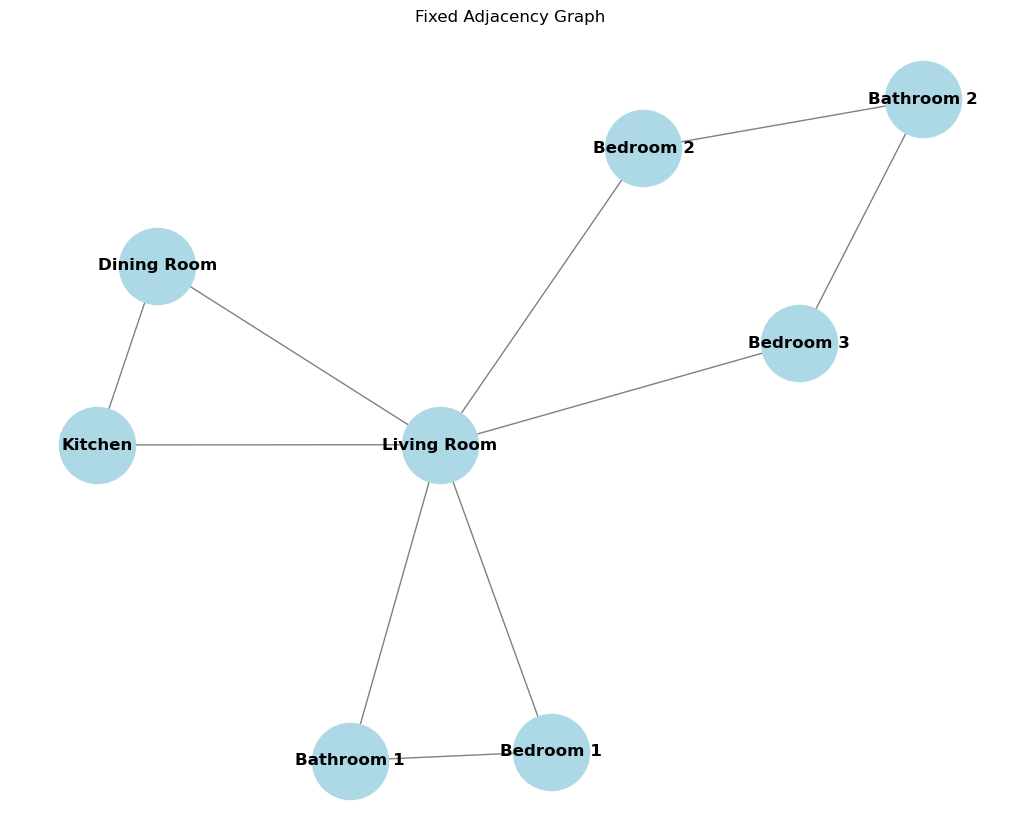

{'Living Room': array([-0.12908783, -0.09242626]), 'Kitchen': array([-0.92967941, -0.09297088]), 'Dining Room': array([-0.78860184,  0.3496831 ]), 'Bedroom 1': array([ 0.12998708, -0.84990009]), 'Bedroom 2': array([0.34673175, 0.63877498]), 'Bedroom 3': array([0.70896997, 0.1590186 ]), 'Bathroom 1': array([-0.33831973, -0.87193691]), 'Bathroom 2': array([1.        , 0.75975746])}


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# 인접 그래프 정의
G = nx.Graph()

rooms = ["Living Room", "Kitchen", "Dining Room", "Bedroom 1", "Bedroom 2", "Bedroom 3", "Bathroom 1", "Bathroom 2"]
edges = [
    ("Living Room", "Kitchen"),
    ("Living Room", "Dining Room"),
    ("Living Room", "Bedroom 1"),
    ("Living Room", "Bedroom 2"),
    ("Living Room", "Bedroom 3"),
    ("Living Room", "Bathroom 1"),
    ("Kitchen", "Dining Room"),
    ("Bedroom 1", "Bathroom 1"),
    ("Bedroom 2", "Bathroom 2"),
    ("Bedroom 3", "Bathroom 2")
]

G.add_nodes_from(rooms)
G.add_edges_from(edges)

# Graph의 위치 고정
pos = nx.spring_layout(G, seed=43)  # seed 값을 고정하여 위치를 고정함

# Graph 그리기
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", edge_color="gray")
plt.title("Fixed Adjacency Graph")
plt.show()

# pos 위치 저장
fixed_positions = pos
print(fixed_positions)


# 고정된 위치를 사용하여 Floorplan 생성

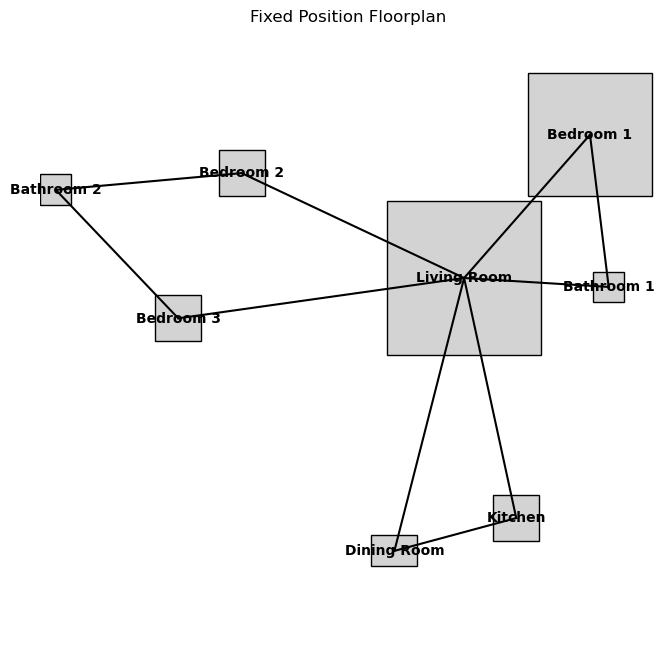

In [14]:
import matplotlib.patches as patches

# Floorplan 그리기 함수
def draw_fixed_floorplan(fixed_positions, room_sizes, connections):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    for room, (x, y) in fixed_positions.items():
        width, height = room_sizes[room]
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor='lightgray')
        ax.add_patch(rect)
        plt.text(x + width/2, y + height/2, room, ha='center', va='center', fontsize=10, fontweight='bold')
    
    for room1, room2 in connections:
        if room1 in fixed_positions and room2 in fixed_positions:
            x1, y1 = fixed_positions[room1]
            x2, y2 = fixed_positions[room2]
            plt.plot([x1 + room_sizes[room1][0]/2, x2 + room_sizes[room2][0]/2], 
                     [y1 + room_sizes[room1][1]/2, y2 + room_sizes[room2][1]/2], 'k-')
    
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.title("Fixed Position Floorplan")
    plt.show()

# 방 크기 정의
room_sizes = {
    "Living Room": (0.5, 0.5),
    "Kitchen": (0.15, 0.15),
    "Dining Room": (0.15, 0.1),
    "Bedroom 1": (0.4, 0.4),
    "Bedroom 2": (0.15, 0.15),
    "Bedroom 3": (0.15, 0.15),
    "Bathroom 1": (0.1, 0.1),
    "Bathroom 2": (0.1, 0.1)
}

# 연결 설정
connections = edges  # 그래프의 엣지와 동일한 연결 설정

# Floorplan 그리기
draw_fixed_floorplan(fixed_positions, room_sizes, connections)


In [19]:
import numpy as np
import itertools

def manhattan_distance(cell1, cell2):
    """
    두 점 사이의 맨해튼 거리를 계산합니다.
    """
    return abs(cell1[0] - cell2[0]) + abs(cell1[1] - cell2[1])

def find_closest_room_pairs(room_seeds, adjacency_requirements, max_distance):
    """
    인접 요구사항에 맞는 방들 중에서 가장 가까운 방 쌍을 찾는 함수.
    
    :param room_seeds: 각 방의 중심점 좌표 (seed 셀)
    :param adjacency_requirements: 인접해야 할 방들의 리스트 (쌍으로 구성)
    :param max_distance: 인접성을 판단하는 기준 거리 (맨해튼 거리)
    
    :return: 인접 요구사항을 만족하는 방 쌍의 리스트 (거리와 함께 반환)
    """
    
    distances = []
    for (room1, seed1), (room2, seed2) in itertools.combinations(room_seeds.items(), 2):
        distance = manhattan_distance(seed1, seed2)
        distances.append(((room1, room2), distance))
    distances.sort(key = lambda x: x[1] )
    print(distances)

    
    closest_pairs = []
    
    for room1, room2 in adjacency_requirements:
        seed1 = room_seeds[room1]
        seed2 = room_seeds[room2]
        distance = manhattan_distance(seed1, seed2)
        closest_pairs.append((room1, room2, distance))
    
    return closest_pairs

# 예시 2차원 그리드 (5x5 그리드 예시)
grid = np.zeros((5, 5))

# 방의 seed 셀들 (각 방의 중심점 좌표 예시)
room_seeds = {
    "Room 1": (1, 1),
    "Room 2": (3, 1),
    "Room 3": (1, 4),
    "Room 4": (3, 4),
    "Room 5": (7, 8),
    "Room 6": (2, 1),
    "Room 7": (5, 2)
}

# 인접 요구사항 (Room 1과 Room 2는 인접해야 함, 등)
adjacency_requirements = [
    ("Room 1", "Room 2"),
    ("Room 3", "Room 4"),
    ("Room 1", "Room 3"),
    ("Room 1", "Room 5"),
    ("Room 1", "Room 7")
]

# 인접성을 판단하는 기준 거리 (맨해튼 거리)
max_distance = 2

# 가까운 방 쌍 찾기
closest_room_pairs = find_closest_room_pairs(room_seeds, adjacency_requirements, max_distance)

# 결과 출력
for room1, room2, distance in closest_room_pairs:
    print(f"Rooms {room1} and {room2} are adjacent with a distance of {distance}.")


[(('Room 1', 'Room 6'), 1), (('Room 2', 'Room 6'), 1), (('Room 1', 'Room 2'), 2), (('Room 3', 'Room 4'), 2), (('Room 1', 'Room 3'), 3), (('Room 2', 'Room 4'), 3), (('Room 2', 'Room 7'), 3), (('Room 3', 'Room 6'), 4), (('Room 4', 'Room 6'), 4), (('Room 4', 'Room 7'), 4), (('Room 6', 'Room 7'), 4), (('Room 1', 'Room 4'), 5), (('Room 1', 'Room 7'), 5), (('Room 2', 'Room 3'), 5), (('Room 3', 'Room 7'), 6), (('Room 4', 'Room 5'), 8), (('Room 5', 'Room 7'), 8), (('Room 3', 'Room 5'), 10), (('Room 2', 'Room 5'), 11), (('Room 5', 'Room 6'), 12), (('Room 1', 'Room 5'), 13)]
Rooms Room 1 and Room 2 are adjacent with a distance of 2.
Rooms Room 3 and Room 4 are adjacent with a distance of 2.


In [21]:
import itertools

def manhattan_distance(cell1, cell2):
    """
    두 점 사이의 맨해튼 거리를 계산합니다.
    """
    return abs(cell1[0] - cell2[0]) + abs(cell1[1] - cell2[1])


def find_closest_pairs(room_seeds):
    """
    모든 방들 사이의 맨해튼 거리를 계산하고, 가까운 순서대로 정렬된 방 쌍을 반환합니다.
    
    :param room_seeds: 각 방의 중심점 좌표 (seed 셀)
    :return: 가까운 순서로 정렬된 방 쌍과 그 사이의 거리 리스트
    """
    distances = []
    
    # 모든 방 쌍에 대해 거리를 계산
    for (room1, seed1), (room2, seed2) in itertools.combinations(room_seeds.items(), 2):
        distance = manhattan_distance(seed1, seed2)
        distances.append(((room1, room2), distance))
    
    # 거리를 기준으로 정렬
    distances.sort(key=lambda x: x[1])
    
    return distances


def reassign_rooms_based_on_proximity(closest_room_pairs, adjacency_requirements):
    """
    가까운 방 쌍 리스트를 토대로 Adjacency_Requirements에 따라 방을 재배정합니다.
    
    :param closest_room_pairs: 가까운 순서대로 정렬된 방 쌍과 거리 리스트
    :param adjacency_requirements: 인접 요구사항 (Room 쌍 리스트)
    :return: 재배정된 Adjacency_Requirements 리스트
    """
    reassigned_pairs = []
    used_rooms = set()

    for (req_room1, req_room2) in adjacency_requirements:
        for (close_room1, close_room2), _ in closest_room_pairs:
            # 방들이 재배정되지 않았고, 요구사항을 만족할 수 있는지 확인
            if (close_room1 not in used_rooms) and (close_room2 not in used_rooms):
                reassigned_pairs.append((close_room1, close_room2))
                used_rooms.add(close_room1)
                used_rooms.add(close_room2)
                break
    
    return reassigned_pairs

# Adjacency_Requirements 정의
adjacency_requirements = [
    ("Room 1", "Room 2"),
    ("Room 1", "Room 3"),
    ("Room 1", "Room 4"),
    ("Room 1", "Room 5"),
    ("Room 1", "Room 6"),
    ("Room 2", "Room 8"),
    ("Room 3", "Room 1"),
    ("Room 4", "Room 7")
]

# 방의 seed 셀들 (각 방의 중심점 좌표 예시)
room_seeds = {
    "Room 1": (1, 1),
    "Room 2": (3, 1),
    "Room 3": (1, 4),
    "Room 4": (3, 4),
    "Room 5": (2, 2),
    "Room 6": (0, 0),
    "Room 7": (4, 4),
    "Room 8": (2, 3)
}

# 가까운 방 쌍 찾기
closest_room_pairs = find_closest_pairs(room_seeds)

# 재배정된 방 쌍 찾기
reassigned_pairs = reassign_rooms_based_on_proximity(closest_room_pairs, adjacency_requirements)

# 결과 출력
print("Reassigned Adjacency Requirements:")
for room1, room2 in reassigned_pairs:
    print(f"{room1} is adjacent to {room2}")


Reassigned Adjacency Requirements:
Room 4 is adjacent to Room 7
Room 5 is adjacent to Room 8
Room 1 is adjacent to Room 2
Room 3 is adjacent to Room 6


# 가까운 순서대로 adjacency_requirement를 만족할 수 있도록 seed의 위치를 재정비 

In [22]:
import numpy as np
import itertools

def manhattan_distance(cell1, cell2):
    return abs(cell1[0] - cell2[0]) + abs(cell1[1] - cell2[1])

def find_closest_pairs(room_seeds):
    distances = []
    for (room1, seed1), (room2, seed2) in itertools.combinations(room_seeds.items(), 2):
        distance = manhattan_distance(seed1, seed2)
        distances.append(((room1, room2), distance))
    distances.sort(key=lambda x: x[1])
    return distances

def reassign_seeds_based_on_proximity(closest_room_pairs, adjacency_requirements, room_seeds):
    new_seeds = room_seeds.copy()
    used_rooms = set()

    for (req_room1, req_room2) in adjacency_requirements:
        for (close_room1, close_room2), _ in closest_room_pairs:
            if close_room1 not in used_rooms and close_room2 not in used_rooms:
                # 인접 요구사항과 가장 가까운 방 쌍을 매칭
                if (req_room1, req_room2) == (close_room1, close_room2) or (req_room2, req_room1) == (close_room1, close_room2):
                    new_seeds[req_room1], new_seeds[req_room2] = new_seeds[close_room1], new_seeds[close_room2]
                    used_rooms.add(req_room1)
                    used_rooms.add(req_room2)
                    break
                # 위치 교환
                elif req_room1 == close_room1 or req_room2 == close_room2:
                    new_seeds[req_room1], new_seeds[req_room2] = new_seeds[close_room2], new_seeds[close_room1]
                    used_rooms.add(req_room1)
                    used_rooms.add(req_room2)
                    break

    return new_seeds

# 예제 방의 seed 셀들
room_seeds = {
    "Room 1": (1, 1),
    "Room 2": (3, 1),
    "Room 3": (1, 4),
    "Room 4": (3, 4),
    "Room 5": (2, 2),
    "Room 6": (0, 0),
    "Room 7": (4, 4),
    "Room 8": (2, 3)
}

# 인접 요구사항
adjacency_requirements = [
    ("Room 1", "Room 2"),
    ("Room 1", "Room 3"),
    ("Room 1", "Room 4"),
    ("Room 1", "Room 5"),
    ("Room 1", "Room 6"),
    ("Room 2", "Room 8"),
    ("Room 3", "Room 1"),
    ("Room 4", "Room 7")
]

# 가까운 방 쌍 찾기
closest_room_pairs = find_closest_pairs(room_seeds)

# 재배정된 Seed 위치 찾기
reassigned_seeds = reassign_seeds_based_on_proximity(closest_room_pairs, adjacency_requirements, room_seeds)

# 결과 출력
print("Reassigned Room Seeds:")
for room, position in reassigned_seeds.items():
    print(f"{room} is reassigned to position {position}")


Reassigned Room Seeds:
Room 1 is reassigned to position (1, 4)
Room 2 is reassigned to position (2, 3)
Room 3 is reassigned to position (4, 4)
Room 4 is reassigned to position (1, 4)
Room 5 is reassigned to position (1, 4)
Room 6 is reassigned to position (1, 4)
Room 7 is reassigned to position (4, 4)
Room 8 is reassigned to position (1, 4)
